In [1]:
# import dependencies
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
from itertools import combinations
import matplotlib.pyplot as plt

In [2]:
# read in dataset as csv
df = pd.read_csv('sports_management_dataset.csv')
df.head()

,Energy Consumption,Carbon Emissions,Waste Generation,Community Engagement,Volunteer Participation,Health Impact,Water Usage,Material Recycling Rate,Operational Cost Efficiency,Event Scale,Event Focus,Sustainability Score,Social Impact Level,Resource Efficiency,Event Type Classification
0,Moderate,High,High,Moderate Engagement,Moderate,Moderate Impact,Moderate,Moderate,High Efficiency,Local,Community Development,Low,High Engagement,Moderate Efficiency,Health-Oriented
1,High,Moderate,High,Moderate Engagement,Low,Low Impact,Moderate,Low,Moderate Efficiency,National,Community Development,Moderate,Low Engagement,Moderate Efficiency,Recreational
2,High,High,High,Low Engagement,High,Moderate Impact,Moderate,Moderate,Moderate Efficiency,National,Community Development,High,Low Engagement,High Efficiency,Recreational
3,High,High,High,Moderate Engagement,Moderate,Moderate Impact,Moderate,Moderate,Moderate Efficiency,Regional,Community Development,High,Low Engagement,High Efficiency,Recreational
4,Moderate,High,Low,Low Engagement,Low,Moderate Impact,High,High,High Efficiency,Regional,Community Development,Low,Moderate Engagement,Moderate Efficiency,Community Development


In [3]:
# get an overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102000 entries, 0 to 101999
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Energy Consumption           102000 non-null  object
 1   Carbon Emissions             102000 non-null  object
 2   Waste Generation             102000 non-null  object
 3   Community Engagement         102000 non-null  object
 4   Volunteer Participation      102000 non-null  object
 5   Health Impact                102000 non-null  object
 6   Water Usage                  102000 non-null  object
 7   Material Recycling Rate      102000 non-null  object
 8   Operational Cost Efficiency  102000 non-null  object
 9   Event Scale                  102000 non-null  object
 10  Event Focus                  102000 non-null  object
 11  Sustainability Score         102000 non-null  object
 12  Social Impact Level          102000 non-null  object
 13  Resource Effic

In [4]:
# check for number of unique values for each column to get an idea of how to encode the data
df.nunique()

Energy Consumption             3
Carbon Emissions               3
Waste Generation               3
Community Engagement           3
Volunteer Participation        3
Health Impact                  3
Water Usage                    3
Material Recycling Rate        3
Operational Cost Efficiency    3
Event Scale                    3
Event Focus                    4
Sustainability Score           3
Social Impact Level            3
Resource Efficiency            3
Event Type Classification      4
dtype: int64

In [5]:
# # from the dataset's documentation we learned that the columns  'Sustainability Score',
# # 'Social Impact Level', 'Resource Efficiency', and 'Event Type Classification' were all target columns
# # let's get simple vizualization 
# impact_counts = df['Social Impact Level'].value_counts()
# sustainability_counts = df['Sustainability Score'].value_counts()
# resource_eff_counts = df['Resource Efficiency'].value_counts()
# event_class_counts = df['Event Type Classification'].value_counts()

# # # Combine all counts into a single DataFrame
# combined_counts = pd.DataFrame({
#     'Social Impact Level': impact_counts,
#     'Sustainability Score': sustainability_counts,
#     'Resource Efficiency': resource_eff_counts,
#     'Event Type Classification': event_class_counts
# })


# # Plot the combined counts
# combined_counts.plot(kind='bar', figsize=(10, 6))
# plt.title('Counts of Different Categories')
# plt.xlabel('Categories')
# plt.ylabel('Counts')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

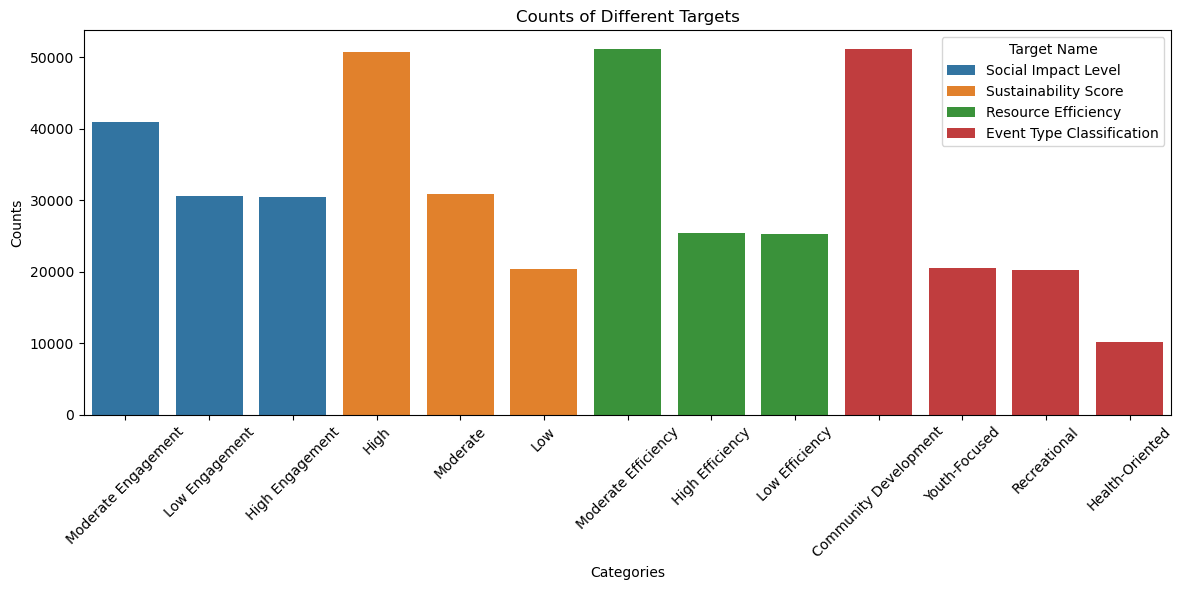

In [6]:
# from the dataset's documentation we learned that the columns  'Sustainability Score',
# 'Social Impact Level', 'Resource Efficiency', and 'Event Type Classification' were all target columns
# let's get simple vizualization to see if there is any imbalance 

# received help from Xpert Learning Assistant for codes realted to sns
import seaborn as sns


# Assuming df is your DataFrame
impact_counts = df['Social Impact Level'].value_counts().reset_index()
sustainability_counts = df['Sustainability Score'].value_counts().reset_index()
resource_eff_counts = df['Resource Efficiency'].value_counts().reset_index()
event_class_counts = df['Event Type Classification'].value_counts().reset_index()

# Rename columns for clarity
impact_counts.columns = ['Category', 'Count']
sustainability_counts.columns = ['Category', 'Count']
resource_eff_counts.columns = ['Category', 'Count']
event_class_counts.columns = ['Category', 'Count']

# Add a new column to identify the source of each count
impact_counts['Target Name'] = 'Social Impact Level'
sustainability_counts['Target Name'] = 'Sustainability Score'
resource_eff_counts['Target Name'] = 'Resource Efficiency'
event_class_counts['Target Name'] = 'Event Type Classification'

# Combine all counts into a single DataFrame
combined_counts = pd.concat([impact_counts, sustainability_counts, resource_eff_counts, event_class_counts])

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=combined_counts, x='Category', y='Count', hue='Target Name')
plt.title('Counts of Different Targets')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
# from the bar graph above we can see that the columns Sustainability Score', 'Resource Efficiency" are slightly imblanced 
# and 'Event Type Classification' extremely imbalanced 
# let's calculate the percentage of each value in the columns 
print(df['Sustainability Score'].value_counts(normalize=True) * 100)
print(df['Resource Efficiency'].value_counts(normalize=True) * 100)
print(df['Event Type Classification'].value_counts(normalize=True) * 100)



Sustainability Score
High        49.702941
Moderate    30.285294
Low         20.011765
Name: proportion, dtype: float64
Resource Efficiency
Moderate Efficiency    50.217647
High Efficiency        24.940196
Low Efficiency         24.842157
Name: proportion, dtype: float64
Event Type Classification
Community Development    50.115686
Youth-Focused            20.095098
Recreational             19.815686
Health-Oriented           9.973529
Name: proportion, dtype: float64


In [ ]:
#How to handle imbalance data
# Resampling Techniques (see below)
    # Oversampling
    # Undersampling
# Synthetic Data Generation
    # SMOTE (see below)
# Clustering Techniques
    # Cluster Centroids (see below)
# Model Selection - tree-based models often perform better than linear models in such scenarios
    # Decision Trees (13.2.4)
    # RandomForest (13.2.5 & 13.2.6 & also shown below)
    # Extra Tees Model (13.2.7)
    # Gradient Boosting (13.2.7)
    # AdaBoost (13.2.7)

#14.3.4 Resampling
## Prepare the Data

# Import modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Read the CSV file into a Pandas DataFrame
bank_data_df = pd.read_csv('../Resources/bank.csv')

# Review the DataFrame
bank_data_df.head()

# Split the features and target data
y = bank_data_df['y']
X = bank_data_df.drop(columns='y')

# Encode the features dataset's categorical variables using get_dummies
X = pd.get_dummies(X)

# Review the features DataFrame
X.head()

# Split data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Review the distinct values from y
y_train.value_counts()

# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

## RandomForestClassifier
# Import the RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# Instantiate a RandomForestClassifier instance
model = RandomForestClassifier()

# Fit the traning data to the model
model.fit(X_train_scaled, y_train)

# Predict labels for original scaled testing features
y_pred = model.predict(X_test_scaled)

## Random Undersampler
# Import RandomUnderSampler from imblearn
from imblearn.under_sampling import RandomUnderSampler

# Instantiate a RandomUnderSampler instance
rus = RandomUnderSampler(random_state=1)

# Fit the training data to the random undersampler model
X_undersampled, y_undersampled = rus.fit_resample(X_train_scaled, y_train)

# Count distinct values for the resampled target data
y_undersampled.value_counts()

# Instantiate a new RandomForestClassier model
model_undersampled = RandomForestClassifier()

# Fit the undersampled data the new model
model_undersampled.fit(X_undersampled, y_undersampled)

# Predict labels for oversampled testing features
y_pred_undersampled = model_undersampled.predict(X_test_scaled)

# Print classification reports
print(f"Classification Report - Original Data")
print(classification_report(y_test, y_pred))
print("---------")
print(f"Classification Report - Undersampled Data")
print(classification_report(y_test, y_pred_undersampled))

## Random Oversampler
# Import RandomOverSampler from imblearn
from imblearn.over_sampling import RandomOverSampler

# Instantiate a RandomOversampler instance
ros = RandomOverSampler(random_state=1)

# Fit the training data to the `RandomOverSampler` model
X_oversampled, y_oversampled = ros.fit_resample(X_train_scaled, y_train)

# Count distinct values
y_oversampled.value_counts()

# Instantiate a new RandomForestClassier model
model_oversampled = RandomForestClassifier()

# Fit the oversampled data the new model
model_oversampled.fit(X_oversampled, y_oversampled)

# Predict labels for oversampled testing features
y_pred_oversampled = model_oversampled.predict(X_test_scaled)

# Print classification reports
print(f"Classification Report - Original Data")
print(classification_report(y_test, y_pred))
print("---------")
print(f"Classification Report - Undersampled Data")
print(classification_report(y_test, y_pred_undersampled))
print("---------")
print(f"Classification Report - Oversampled Data")
print(classification_report(y_test, y_pred_oversampled))

## Cluster Centroids
# Import ClusterCentroids from imblearn
from imblearn.under_sampling import ClusterCentroids

# Instantiate a ClusterCentroids instance
cc_sampler = ClusterCentroids(random_state=1)

# Fit the training data to the cluster centroids model
X_resampled, y_resampled = cc_sampler.fit_resample(X_train_scaled, y_train)

# Count distinct values for the resampled target data
y_resampled.value_counts()

# Instantiate a new RandomForestClassier model
cc_model = RandomForestClassifier()

# Fit the resampled data the new model
cc_model.fit(X_resampled, y_resampled)

# Predict labels for resampled testing features
cc_y_pred = cc_model.predict(X_test_scaled)

# Print classification reports
print(f"Classification Report - Original Data")
print(classification_report(y_test, y_pred))
print("---------")
print(f"Classification Report - Resampled Data - CentroidClusters")
print(classification_report(y_test, cc_y_pred))

## SMOTE
# Import SMOTE from imblearn
from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE instance 
# Set the sampling_strategy parameter equal to auto
smote_sampler = SMOTE(random_state=1, sampling_strategy='auto')

# Fit the training data to the smote_sampler model
X_resampled, y_resampled = smote_sampler.fit_resample(X_train_scaled, y_train)

# Count distinct values for the resampled target data
y_resampled.value_counts()

# Instantiate a new RandomForestClassier model 
smote_model = RandomForestClassifier()

# Fit the resampled data to the new model
smote_model.fit(X_resampled, y_resampled)

# Predict labels for resampled testing features
smote_y_pred = smote_model.predict(X_test_scaled)

# Print classification reports
print(f"Classification Report - Original Data")
print(classification_report(y_test, y_pred))
print("---------")
print(f"Classification Report - Resampled Data - SMOTE")
print(classification_report(y_test, smote_y_pred))

## SMOTEENN
# Import SMOTEEN from imblearn
from imblearn.combine import SMOTEENN

# Instantiate the SMOTEENN instance
smote_enn = SMOTEENN(random_state=1)

# Fit the model to the training data
X_resampled, y_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

# Instantiate a new RandomForestClassier model
smoteenn_model = RandomForestClassifier()

# Fit the resampled data the new model
smoteenn_model.fit(X_resampled, y_resampled)

# Predict labels for resampled testing features
smoteenn_y_pred = smoteenn_model.predict(X_test_scaled)

# Print classification reports
print(f"Classification Report - Original Data")
print(classification_report(y_test, y_pred))
print("---------")
print(f"Classification Report - Resampled Data - SMOTEENN")
print(classification_report(y_test, smoteenn_y_pred))

In [8]:
# we can't use the correlation matrix for categorical values so let's try the chi-square test
# generate all possible combination pairs of column names
# help received from Xpert Learning Assistant for the 
# code related to the generation of a chi_sqaure test of independency 
column_combinations = combinations(df.columns, 2)

# Store results in a list
results = []
# Perform Chi-square test for each combination
# append the column names and chi^2 and p-values to the results list
for col1, col2 in column_combinations:
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results.append({'Column1': col1, 'Column2': col2, 'Chi2': chi2, 'p-value': p})

# Create a DataFrame from the results
results_df = pd.DataFrame(results)
results_df

,Column1,Column2,Chi2,p-value
0,Energy Consumption,Carbon Emissions,0.316704,0.988710
1,Energy Consumption,Waste Generation,6.656264,0.155207
2,Energy Consumption,Community Engagement,3.627480,0.458761
3,Energy Consumption,Volunteer Participation,1.883528,0.757170
4,Energy Consumption,Health Impact,8.277472,0.081927
...,...,...,...,...
100,Sustainability Score,Resource Efficiency,1.869042,0.759830
101,Sustainability Score,Event Type Classification,2.323675,0.887656
102,Social Impact Level,Resource Efficiency,5.616053,0.229715
103,Social Impact Level,Event Type Classification,3.792196,0.704774


In [9]:
# we are setting the alpha level to 0.05 for now 
# null hypothesis: there is no correlation between column 1 and column 2
# let's go through redults_df and see if there are p-values < 0.05

significant_results = results_df[results_df['p-value'] < 0.05]
significant_results

,Column1,Column2,Chi2,p-value
19,Carbon Emissions,Material Recycling Rate,11.667041,0.020007
38,Waste Generation,Event Type Classification,15.510081,0.016640
63,Health Impact,Event Scale,20.935066,0.000326
65,Health Impact,Sustainability Score,12.753849,0.012543
94,Event Scale,Event Type Classification,15.287250,0.018136
